# Difference between fit, transform, predict

In [39]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Data file open

In [4]:
file_path = r'..\..\data\titanic_train.csv'

In [5]:
df = pd.read_csv(file_path, usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head(2)

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [8]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [10]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

## train test split

In [19]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [20]:
X.head(2)

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833


In [ ]:
y

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

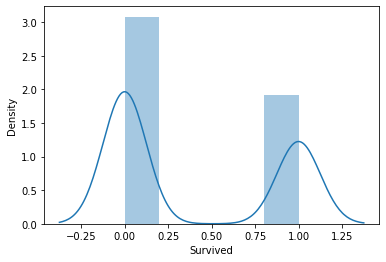

In [23]:
sns.distplot(y)

In [22]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
len(X_train), len(y_train), len(X_test), len(y_test)

(712, 712, 179, 179)

## Transform the feature (StandardScaler)

In [27]:
scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)

In [29]:
X_train_scaled

array([[-1.61413602,  1.25364106, -0.07868358],
       [-0.40055118, -0.47728355, -0.37714494],
       [ 0.81303367,  0.21508629, -0.47486697],
       ...,
       [ 0.81303367,  0.90745614, -0.35580399],
       [-1.61413602, -1.1696534 ,  1.68320121],
       [-1.61413602, -0.63114352,  0.86074761]])

In [30]:
scaler.mean_

array([ 2.33005618, 29.20412921, 32.58627612])

In [31]:
X_test_scaled = scaler.transform(X_test)

In [32]:
X_test_scaled

array([[ 8.13033667e-01, -9.26336398e-02, -3.33900778e-01],
       [-4.00551178e-01,  1.38156309e-01, -4.25283869e-01],
       [ 8.13033667e-01, -7.08073503e-01, -4.74866965e-01],
       [-4.00551178e-01, -1.78509326e+00,  7.96648968e-03],
       [ 8.13033667e-01, -1.16965340e+00, -4.11002011e-01],
       [-1.61413602e+00, -2.46493606e-01,  8.90834443e-01],
       [ 8.13033667e-01, -9.26336398e-02, -4.78236690e-01],
       [ 8.13033667e-01, -1.01579343e+00, -2.80867083e-01],
       [ 8.13033667e-01, -1.01579343e+00, -4.78236690e-01],
       [-1.61413602e+00, -7.85003486e-01, -1.21367407e-01],
       [-1.61413602e+00,  5.99736206e-01,  3.95003477e-01],
       [ 8.13033667e-01,  1.13824609e+00, -4.72460019e-01],
       [ 8.13033667e-01, -9.26336398e-02, -1.37091507e-01],
       [ 8.13033667e-01,  6.12263260e-02, -4.88345865e-01],
       [-4.00551178e-01,  5.22806223e-01, -3.77144940e-01],
       [-1.61413602e+00, -1.01579343e+00,  1.31202147e-01],
       [-1.61413602e+00,  9.84386120e-01

## Model Building

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_hat = model.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_hat))

[[53  0  0]
 [ 0 33  0]
 [ 0  0 93]]


In [40]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        93

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

